以简单的 GLM 为例子

In [1]:
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

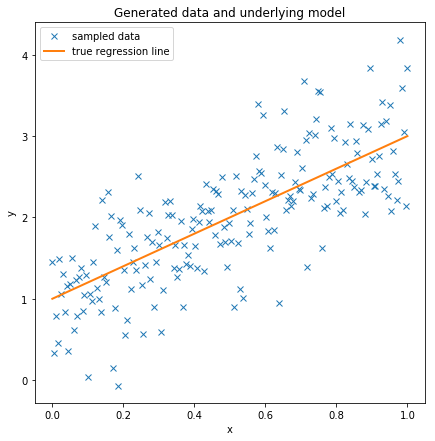

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [4]:
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sd=20)
    x_coeff = Normal('x', 0, sd=20)
    
    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x, 
                        sd=sigma, observed=y)
    
    # Inference!
    trace = sample(progressbar=False) # draw posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/root/anaconda3/envs/wc/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.88650786522, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))


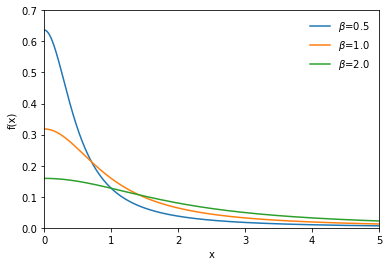

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
x = np.linspace(0.0, 5.0, 1000)
fig, ax = plt.subplots()
f = lambda b : st.cauchy.pdf(x, scale=b)
plot_pdf = lambda b : ax.plot(x, f(b), label=r'$\beta$={0}'.format(b))
plot_pdf(0.5)
plot_pdf(1.0)
plot_pdf(2.0)
plt.legend(loc='upper right', frameon=False)
ax.set(xlim=[0,5], ylim=[0,0.7], xlabel='x', ylabel='f(x)')
plt.show()